# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [6]:
!pip install umap-learn

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from umap.umap_ import UMAP
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [10]:
df = pd.read_csv("data/Ship_Performance_Dataset.csv")
df_original = df.copy()
df.head()

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [12]:
# General information about the dataset
print(df.shape)
df.info()

(2736, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2600 non-null   object 
 2   Route_Type               2600 non-null   object 
 3   Engine_Type              2600 non-null   object 
 4   Maintenance_Status       2600 non-null   object 
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2600 non-null   object 
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Efficiency_nm

In [13]:
df_kategorikal = df.select_dtypes(include=['object'])
df_kategorikal.head()

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Weather_Condition
0,2023-06-04,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,Moderate
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,Rough
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,Moderate
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,Moderate
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,Moderate


In [14]:
df_numerik = df.select_dtypes(exclude=['object'])
df_numerik.head()

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,12.597558,2062.983982,1030.943616,14.132284,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,10.387580,1796.057415,1060.486382,14.653083,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,20.749747,1648.556685,658.874144,7.199261,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,21.055102,915.261795,1126.822519,11.789063,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,13.742777,1089.721803,1445.281159,9.727833,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581


In [15]:
# Check for missing values
missing_values = df.isnull().sum()

# Check for duplikasi data
duplicate_data = df.duplicated().sum()

print("Jumlah missing values:\n", missing_values)
print("\nJumlah data duplikat:", duplicate_data)

Jumlah missing values:
 Date                         0
Ship_Type                  136
Route_Type                 136
Engine_Type                136
Maintenance_Status         136
Speed_Over_Ground_knots      0
Engine_Power_kW              0
Distance_Traveled_nm         0
Draft_meters                 0
Weather_Condition          136
Cargo_Weight_tons            0
Operational_Cost_USD         0
Revenue_per_Voyage_USD       0
Turnaround_Time_hours        0
Efficiency_nm_per_kWh        0
Seasonal_Impact_Score        0
Weekly_Voyage_Count          0
Average_Load_Percentage      0
dtype: int64

Jumlah data duplikat: 0


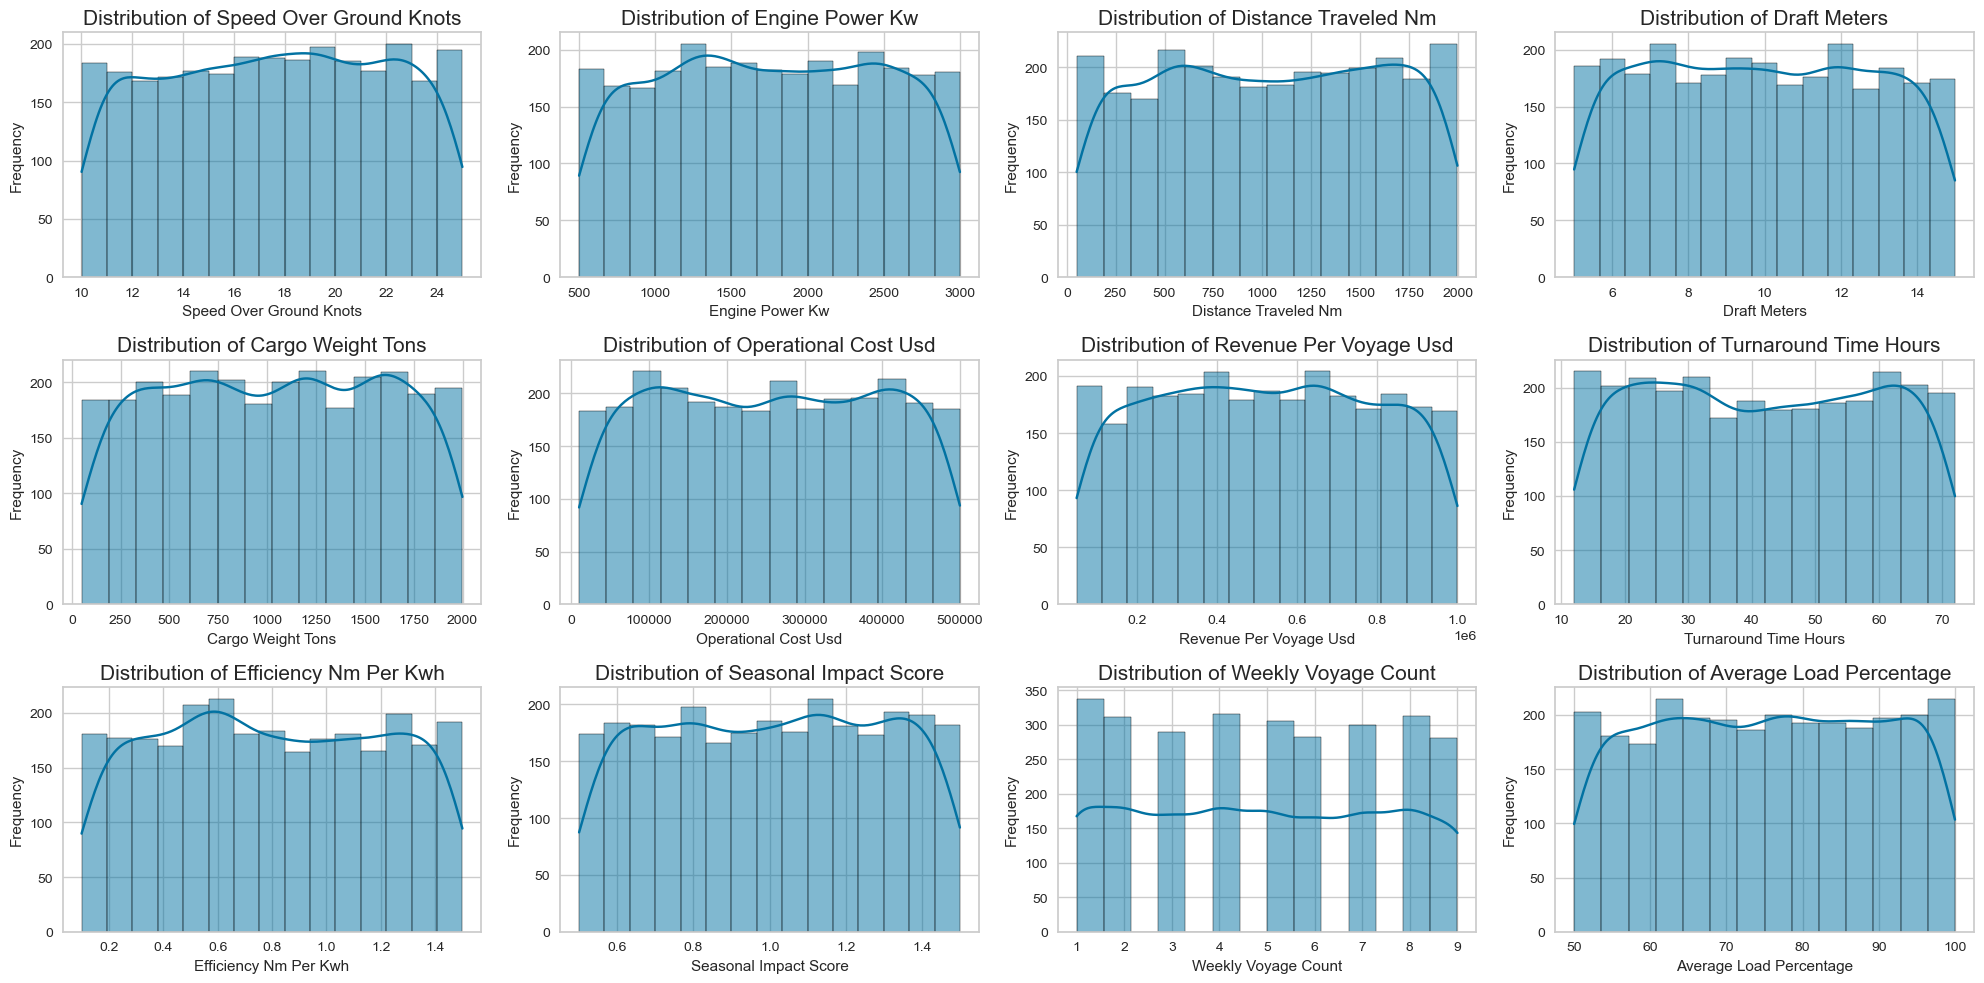

In [16]:
# Histogram visualization of numerical data type inside the dataset
plt.figure(figsize=(20, 10))
for i, col in enumerate(df.select_dtypes(exclude='object').columns.tolist()):
    plt.subplot(3, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col.replace("_", " ").title()}', size=15)
    plt.xlabel(f'{col.replace("_", " ").title()}')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

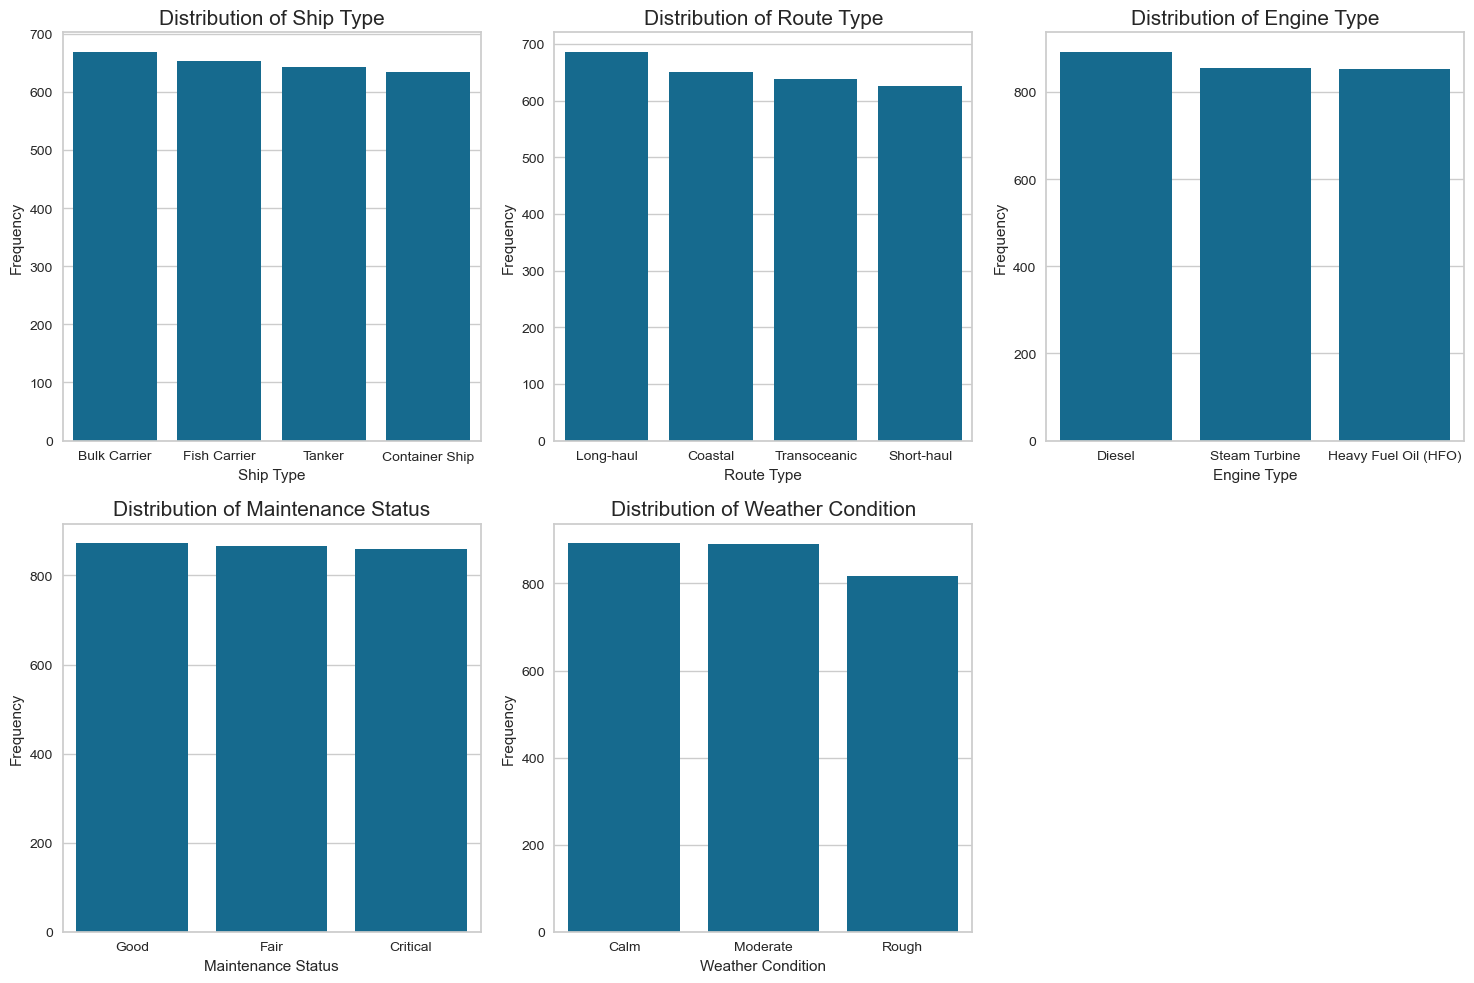

In [17]:
# Bar chart visualization of categorical data type inside the dataset
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include='object').columns.tolist()[1:]): # Exclude the first column (Date)
    plt.subplot(2, 3, i+1)
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values)
    plt.title(f'Distribution of {col.replace("_", " ").title()}', size=15)
    plt.xlabel(f'{col.replace("_", " ").title()}')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

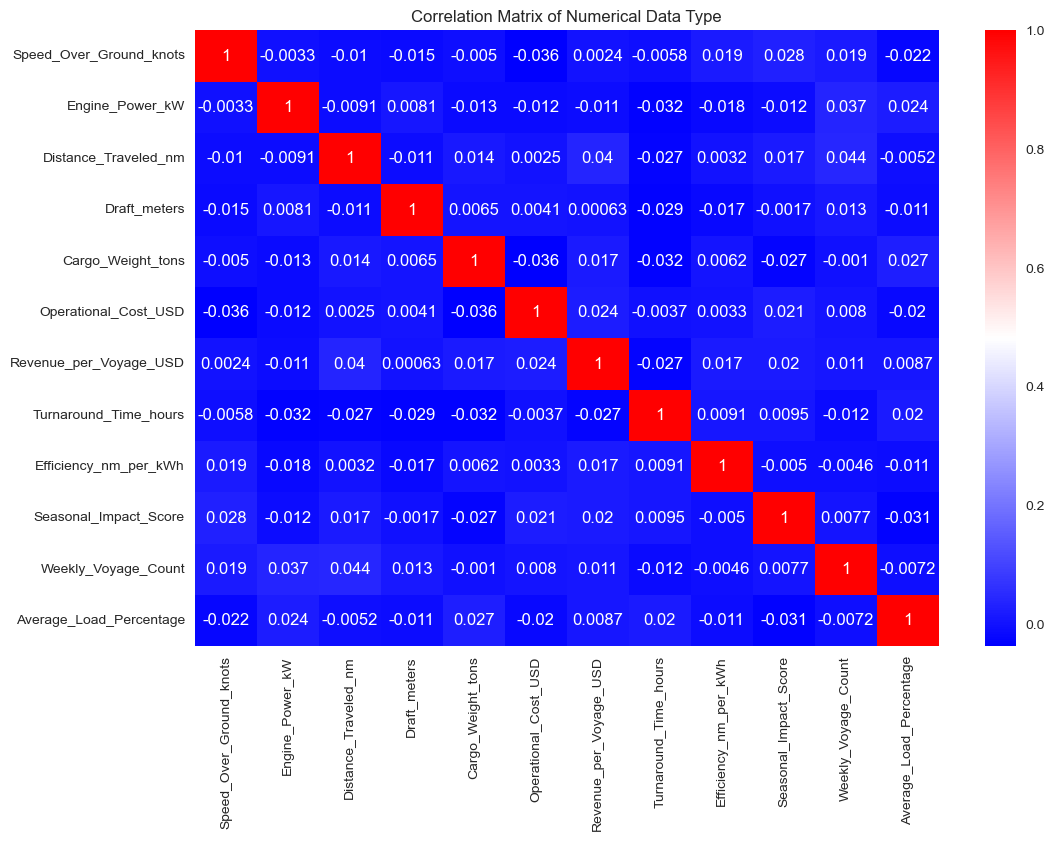

In [18]:
# Matrix correlation of numerical data type inside the dataset
df.select_dtypes(exclude='object').corr()
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, cmap='bwr')
plt.title("Correlation Matrix of Numerical Data Type")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [21]:
# Remove the column Date because it is not needed
df.drop(columns=['Date'], inplace=True)
print("All column needed", df.columns.tolist())

All column needed ['Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status', 'Speed_Over_Ground_knots', 'Engine_Power_kW', 'Distance_Traveled_nm', 'Draft_meters', 'Weather_Condition', 'Cargo_Weight_tons', 'Operational_Cost_USD', 'Revenue_per_Voyage_USD', 'Turnaround_Time_hours', 'Efficiency_nm_per_kWh', 'Seasonal_Impact_Score', 'Weekly_Voyage_Count', 'Average_Load_Percentage']


In [22]:
df.dropna(inplace=True)
print("Here the missing values after cleaning :")
print(df.isnull().sum())
print("\nJumlah data duplikat:", duplicate_data)

Here the missing values after cleaning :
Ship_Type                  0
Route_Type                 0
Engine_Type                0
Maintenance_Status         0
Speed_Over_Ground_knots    0
Engine_Power_kW            0
Distance_Traveled_nm       0
Draft_meters               0
Weather_Condition          0
Cargo_Weight_tons          0
Operational_Cost_USD       0
Revenue_per_Voyage_USD     0
Turnaround_Time_hours      0
Efficiency_nm_per_kWh      0
Seasonal_Impact_Score      0
Weekly_Voyage_Count        0
Average_Load_Percentage    0
dtype: int64

Jumlah data duplikat: 0


In [23]:
df_processed = df.copy()

# Label Encoding for the categorical data type and standardization to categorical data type
numerical_columns = df.select_dtypes(exclude='object').columns.tolist()
scaler = MinMaxScaler()
df_processed[numerical_columns] = scaler.fit_transform(df_processed[numerical_columns])

categorical_columns = df.select_dtypes(include='object').columns.tolist()
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df[col])
    label_encoders[col] = le  

print("Here the sample of the dataset after label encoding and scaling:")
df_processed.sample(5)

Here the sample of the dataset after label encoding and scaling:


,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
2320,1,3,2,0,0.490850,0.768400,0.441398,0.670551,1,0.714418,0.829998,0.171114,0.719071,0.472042,0.733438,0.875,0.230623
1849,1,0,1,1,0.617035,0.723555,0.669170,0.817601,1,0.980989,0.879806,0.368190,0.990429,0.898430,0.308522,0.750,0.421583
113,1,1,0,2,0.481986,0.131309,0.397523,0.337744,1,0.409046,0.082549,0.004018,0.313595,0.723449,0.180007,0.750,0.597896
2526,2,2,2,2,0.325923,0.532937,0.795552,0.431284,0,0.327214,0.217945,0.552956,0.499957,0.312773,0.300107,0.875,0.391538
1464,2,3,2,2,0.060020,0.517811,0.857340,0.851905,2,0.992151,0.469276,0.229219,0.129399,0.715437,0.810584,1.000,0.995971


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [27]:
df_clustered = df_processed.copy()
df_clustered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2127 entries, 1 to 2735
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ship_Type                2127 non-null   int32  
 1   Route_Type               2127 non-null   int32  
 2   Engine_Type              2127 non-null   int32  
 3   Maintenance_Status       2127 non-null   int32  
 4   Speed_Over_Ground_knots  2127 non-null   float64
 5   Engine_Power_kW          2127 non-null   float64
 6   Distance_Traveled_nm     2127 non-null   float64
 7   Draft_meters             2127 non-null   float64
 8   Weather_Condition        2127 non-null   int32  
 9   Cargo_Weight_tons        2127 non-null   float64
 10  Operational_Cost_USD     2127 non-null   float64
 11  Revenue_per_Voyage_USD   2127 non-null   float64
 12  Turnaround_Time_hours    2127 non-null   float64
 13  Efficiency_nm_per_kWh    2127 non-null   float64
 14  Seasonal_Impact_Score    2127

In [28]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(df_clustered)
score = silhouette_score(df_clustered, labels)
print("Silhouette Score untuk k =", k, "adalah:", score)

Silhouette Score untuk k = 2 adalah: 0.17136385342392244


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

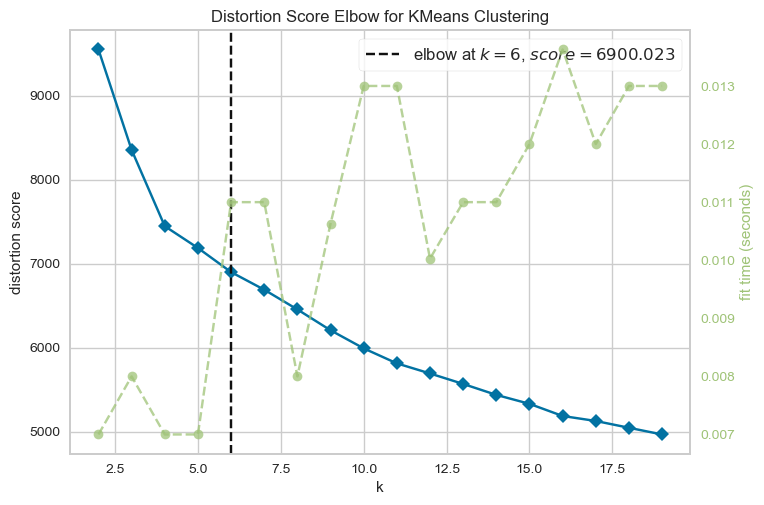

In [31]:
kmeans_model = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans_model, k=(2,20))
visualizer.fit(df_clustered)  # Fit the data to the visualizer
visualizer.show()  # Finalize the plot

plt.show()

In [32]:
optimal_k = 6

kmeans_optimal_elbow = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal_elbow.fit(df_clustered)

silhouette_avg_optimal = silhouette_score(df_clustered, kmeans_optimal_elbow.labels_)
print(f"Silhouette Score : {silhouette_avg_optimal:.4f}")

Silhouette Score : 0.1219


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

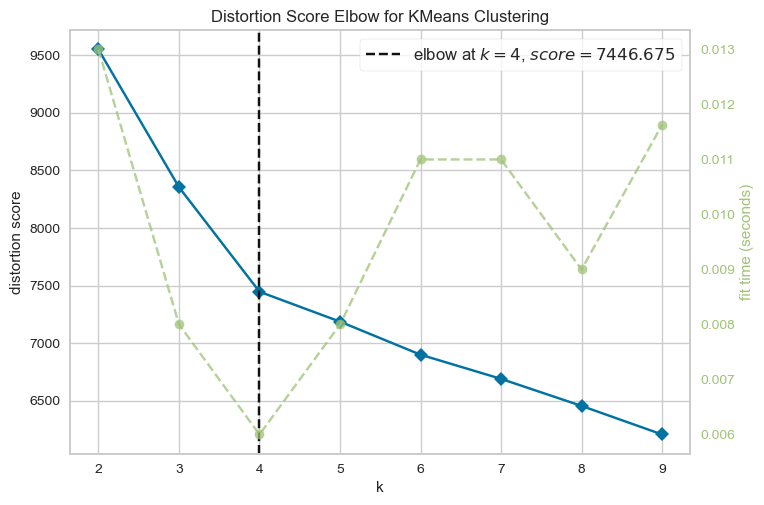

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2, 10), locate_elbow=True)
visualizer.fit(df_clustered)
visualizer.show()

In [36]:
pca = PCA(n_components=2)
pca.fit(df_clustered.drop(columns=["Cluster"], errors="ignore"))  

PCA(n_components=2)

In [37]:
umap = UMAP(n_components=6, random_state=42)
df_umap = umap.fit_transform(df_clustered)  
km_new = KMeans(n_clusters=4, random_state=42, n_init=10).fit(df_umap)
df_clustered['Cluster'] = km_new.labels_
labelss = km_new.labels_
n_clusterss = len(set(labelss))  

silhouette_umap = silhouette_score(df_umap,  km_new.labels_)

print(f"Unique clusters: {set(labelss)}")
print(f"Number of clusters created: {n_clusterss}")
print(f"Silhouette Score dengan UMAP : {silhouette_score(df_umap, labelss):.4f}")

C:\Users\nofen\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Unique clusters: {0, 1, 2, 3}
Number of clusters created: 4
Silhouette Score dengan UMAP : 0.5276


In [38]:
print(f"Silhouette Score (tanpa FS): {silhouette_avg_optimal:.4f}")
print(f"Silhouette Score (dengan FS): {silhouette_umap:.4f}")

# Membandingkan hasil Silhouette Score
if silhouette_avg_optimal > silhouette_umap:
    print(f"Silhouette Score terbesar adalah tanpa FS: {silhouette_avg_optimal:.4f}")
else:
    print(f"Silhouette Score terbesar adalah dengan FS: {silhouette_umap:.4f}")

Silhouette Score (tanpa FS): 0.1219
Silhouette Score (dengan FS): 0.5276
Silhouette Score terbesar adalah dengan FS: 0.5276


In [39]:
from sklearn.feature_selection import SelectKBest, f_classif

# Pilih hanya fitur numerik dari df_clustered
numerical_columns = df_clustered.select_dtypes(include=['number']).columns.drop('Cluster')
X_numerical = df_clustered[numerical_columns]  # Hanya fitur numerik
y = df_clustered['Cluster']  # Target (hasil clustering)

# Normalisasi data (karena beberapa model memerlukan data dalam skala yang sama)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_numerical)

# Pilih fitur terbaik pakai ANOVA F-score
k_best = SelectKBest(score_func=f_classif, k=5)  # Pilih 5 fitur terbaik
X_selected = k_best.fit_transform(X_scaled, y)

# Tampilkan nama fitur yang dipilih
selected_features = numerical_columns[k_best.get_support()]
print("Fitur numerik yang dipilih:", selected_features)

Fitur numerik yang dipilih: Index(['Ship_Type', 'Route_Type', 'Weather_Condition', 'Cargo_Weight_tons',
       'Turnaround_Time_hours'],
      dtype='object')


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

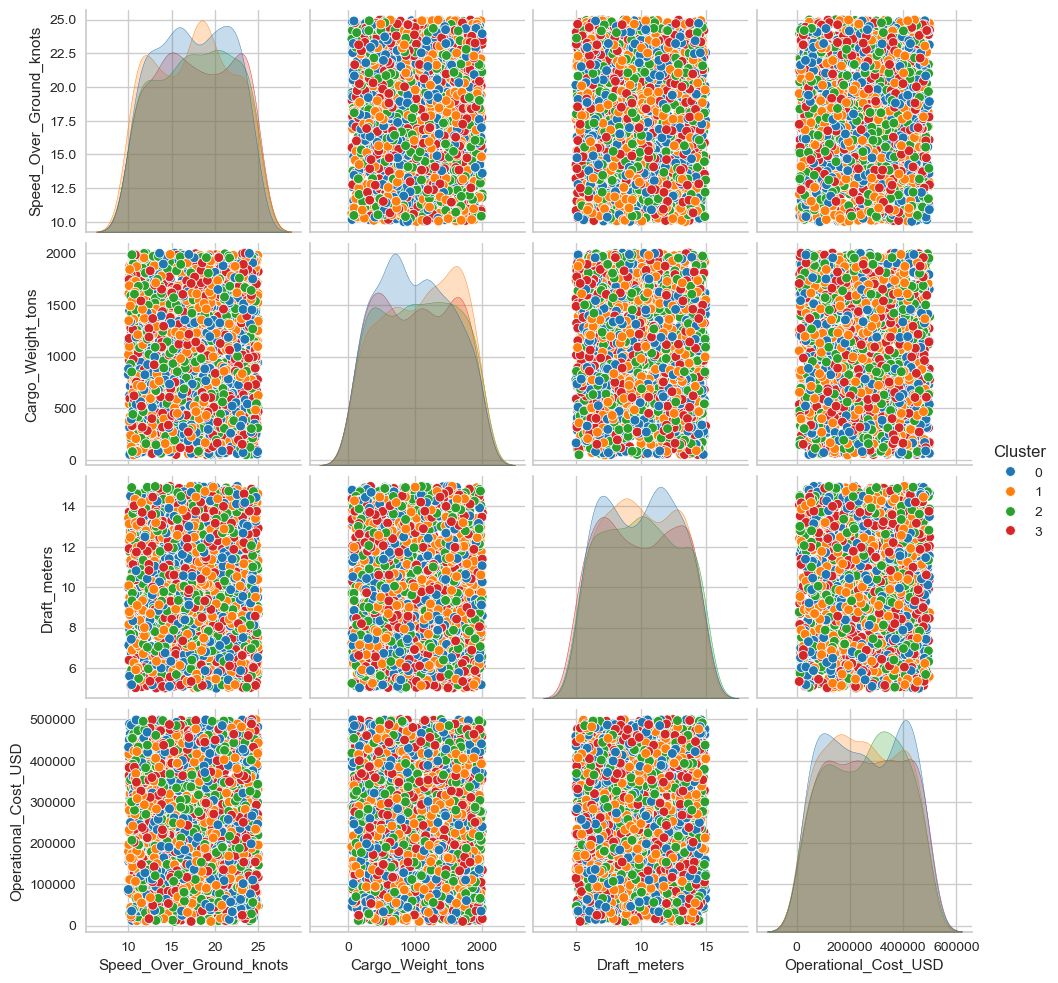

In [42]:
df_original = df_original.loc[df_clustered.index].copy()
df_original["Cluster"] = df_clustered["Cluster"].values  # Tambahkan label cluster

# Pilih beberapa fitur untuk pairplot
selected_features = ["Speed_Over_Ground_knots", "Cargo_Weight_tons", "Draft_meters", "Operational_Cost_USD", "Cluster"]

# Buat pairplot dengan warna berdasarkan cluster
sns.pairplot(df_original[selected_features], hue="Cluster", palette="tab10", diag_kind="kde")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [48]:
numeric_features = ['Cargo_Weight_tons','Turnaround_Time_hours']

df_normalized = df.copy()
df_normalized['Cluster'] = labelss
df_normalized.head()

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,Cluster
1,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372,3
2,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244,0
3,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698,2
4,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581,3
5,Fish Carrier,Long-haul,Heavy Fuel Oil (HFO),Fair,18.616196,2171.646567,723.304215,14.916320,Rough,1912.509751,184569.045384,776698.354849,47.476155,1.370206,1.437725,7,53.174898,1


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [50]:
df_normalized.groupby('Cluster')[['Ship_Type', 'Route_Type', 'Weather_Condition']].agg(lambda x: x.mode()[0]).T

Cluster,0,1,2,3
Ship_Type,Container Ship,Tanker,Bulk Carrier,Fish Carrier
Route_Type,Long-haul,Long-haul,Transoceanic,Short-haul
Weather_Condition,Calm,Calm,Moderate,Moderate


In [51]:
df_normalized.groupby('Cluster')[numeric_features].agg(['mean', 'min', 'max']).round().T

Cluster                          0       1       2       3
Cargo_Weight_tons     mean   992.0  1084.0  1042.0  1017.0
                      min     55.0    50.0    52.0    54.0
                      max   1998.0  1986.0  1997.0  1999.0
Turnaround_Time_hours mean    43.0    40.0    43.0    41.0
                      min     12.0    12.0    12.0    12.0
                      max     72.0    72.0    72.0    72.0

### Analisis Karakteristik Cluster dari Model KMeans
Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans:

#### **Cluster 0**
- **Tipe Kapal**: Container Ship
- **Tipe Rute**: Long-haul
- **Kondisi Cuaca**: Calm
- **Rata-rata Muatan Kargo**: 992 ton
- **Waktu Putar Balik Rata-rata**: 43 jam
- **Analisis**: Cluster ini terdiri dari kapal kontainer yang melakukan perjalanan jarak jauh dalam kondisi cuaca yang relatif tenang. Dengan rata-rata muatan kargo sebesar 992 ton, kapal dalam cluster ini memiliki tingkat pengangkutan yang cukup besar. Waktu turnaround sekitar 43 jam menunjukkan bahwa kapal ini memiliki waktu bongkar muat yang relatif standar untuk jenisnya.

#### **Cluster 1**
- **Tipe Kapal**: Tanker
- **Tipe Rute**: Long-haul
- **Kondisi Cuaca**: Calm
- **Rata-rata Muatan Kargo**: 1,084 ton
- **Waktu Putar Balik Rata-rata**: 40 jam
- **Analisis**: Cluster ini terdiri dari kapal tanker yang melakukan perjalanan jarak jauh dengan kondisi cuaca yang relatif stabil. Rata-rata muatan kargo sebesar 1,084 ton menunjukkan bahwa kapal dalam cluster ini mengangkut volume yang sedikit lebih besar dibandingkan kapal dalam Cluster 0. Dengan waktu turnaround yang lebih cepat (40 jam), kapal ini cenderung memiliki efisiensi yang lebih baik dalam hal bongkar muat dibandingkan Cluster 0.

#### **Cluster 2**
- **Tipe Kapal**: Bulk Carrier
- **Tipe Rute**: Transoceanic
- **Kondisi Cuaca**: Moderate
- **Rata-rata Muatan Kargo**: 1,042 ton
- **Waktu Putar Balik Rata-rata**: 43 jam
- **Analisis**: Cluster ini terdiri dari kapal pengangkut barang curah yang menempuh rute transoceanic dengan kondisi cuaca sedang. Dengan rata-rata muatan kargo sebesar 1,042 ton, kapal dalam cluster ini mengangkut volume yang cukup besar. Waktu turnaround sebesar 43 jam menunjukkan bahwa proses bongkar muat dan operasional mereka sebanding dengan kapal dalam Cluster 0, meskipun berada dalam kondisi cuaca yang sedikit lebih menantang.

#### **Cluster 3**
- **Tipe Kapal**: Fish Carrier
- **Tipe Rute**: Short-haul
- **Kondisi Cuaca**: Moderate
- **Rata-rata Muatan Kargo**: 1,017 ton
- **Waktu Putar Balik Rata-rata**: 41 jam
- **Analisis**: Cluster ini terdiri dari kapal pengangkut ikan yang beroperasi pada rute jarak pendek dengan kondisi cuaca sedang. Dengan rata-rata muatan sebesar 1,017 ton, kapal ini membawa muatan dalam jumlah yang cukup besar untuk perjalanan pendeknya. Waktu turnaround 41 jam menunjukkan bahwa kapal dalam cluster ini memiliki efisiensi operasional yang cukup baik, meskipun kondisi cuaca yang dihadapi lebih menantang dibandingkan Cluster 0 dan 1.

### **Kesimpulan**
Dari analisis ini, dapat disimpulkan bahwa:
- **Cluster 0 dan 1** berisi kapal yang menempuh perjalanan long-haul dalam kondisi cuaca yang relatif tenang.
- **Cluster 2 dan 3** beroperasi dalam kondisi cuaca yang lebih menantang, dengan Cluster 2 menempuh rute transoceanic dan Cluster 3 berada di rute short-haul.
- Kapal dalam **Cluster 1** memiliki muatan kargo tertinggi dengan waktu turnaround tercepat, menunjukkan efisiensi operasional yang baik.
- Kapal dalam **Cluster 3** memiliki muatan yang cukup besar untuk ukuran rute pendeknya, yang menunjukkan strategi pengangkutan yang berbeda dibandingkan cluster lainnya.

Hasil ini dapat digunakan untuk mengoptimalkan strategi operasional, termasuk penjadwalan kapal dan pengelolaan muatan berdasarkan jenis rute dan kondisi cuaca.



# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [54]:
df_normalized.to_csv("data/data_clustered.csv", index=False)